In [1]:
from Bio import SeqIO
from matplotlib import pyplot
from scipy.stats import f_oneway, chisquare
from statsmodels.stats.multitest import fdrcorrection
import math
import numpy as np
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import pyranges
import seaborn as sns

In [2]:
sns.set()
from pylab import rcParams
rcParams['figure.figsize'] = 16, 12

In [38]:
import plotly.io as pio
# pio.renderers.default = "browser"
pio.renderers.default = "jupyterlab"
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'jupyterlab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

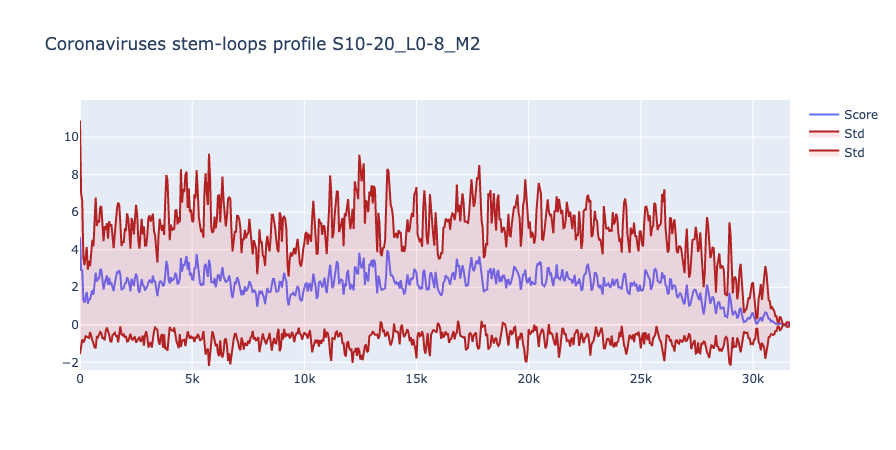

In [4]:
bins_scores_df = pd.read_csv(f'pal_S10-20_L0-8_M2_scores_by_virus_100.csv')
# bins_scores_pvals_df['NegLog10Pval'] = -1 * np.log10(bins_scores_pvals_df.P_val)
# bins_scores_pvals_df['NegLog10AdjPval'] = -1 * np.log10(bins_scores_pvals_df.P_val_adjusted)
# LOG_DEFAULT_THRESHOLD = -1 * np.log10(PVAL_THRESHOLD)
bins_scores_df_by_bins = bins_scores_df.groupby('Start').agg({'Score': np.mean}).reset_index()
bins_scores_df_by_bins['Std'] = bins_scores_df.groupby('Start').agg({'Score': np.std}).reset_index(drop=True)
bins_scores_df_by_bins = bins_scores_df_by_bins.fillna(0)
MAX_Y_VALUE = (bins_scores_df_by_bins['Score'] + bins_scores_df_by_bins['Std']).max() * 1.1
MIN_Y_VALUE = (bins_scores_df_by_bins['Score'] - bins_scores_df_by_bins['Std']).min() * 1.1
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=bins_scores_df_by_bins['Start'],
        y=bins_scores_df_by_bins['Score'],
        name='Score',
    )
)
fig.add_trace(
    go.Scatter(
        x=bins_scores_df_by_bins['Start'],
        y=bins_scores_df_by_bins['Score'] + bins_scores_df_by_bins['Std'],
        name='Std',
        fill='tozeroy',
        fillcolor='rgba(255, 0, 0, 0.1)',
        line=dict(color='firebrick'),
        opacity=0.1
    )
)
fig.add_trace(
    go.Scatter(
        x=bins_scores_df_by_bins['Start'],
        y=bins_scores_df_by_bins['Score'] - bins_scores_df_by_bins['Std'],
        name='Std',
        fill='tozeroy',
        fillcolor='rgba(255, 0, 0, 0.1)',
        line=dict(color='firebrick'),
        opacity=0.1
    )
)
fig.update_layout(
    title='Coronaviruses stem-loops profile S10-20_L0-8_M2',
)
fig.update_yaxes(range=[MIN_Y_VALUE, MAX_Y_VALUE])
fig.show()

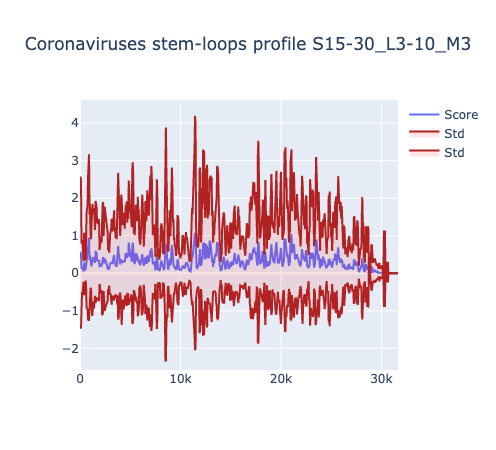

In [23]:
bins_scores_df = pd.read_csv(f'pal_S15-30_L3-10_M3_scores_by_virus_100.csv')
# bins_scores_pvals_df['NegLog10Pval'] = -1 * np.log10(bins_scores_pvals_df.P_val)
# bins_scores_pvals_df['NegLog10AdjPval'] = -1 * np.log10(bins_scores_pvals_df.P_val_adjusted)
# LOG_DEFAULT_THRESHOLD = -1 * np.log10(PVAL_THRESHOLD)
bins_scores_df_by_bins = bins_scores_df.groupby('Start').agg({'Score': np.mean}).reset_index()
bins_scores_df_by_bins['Std'] = bins_scores_df.groupby('Start').agg({'Score': np.std}).reset_index(drop=True)
bins_scores_df_by_bins = bins_scores_df_by_bins.fillna(0)
MAX_Y_VALUE = (bins_scores_df_by_bins['Score'] + bins_scores_df_by_bins['Std']).max() * 1.1
MIN_Y_VALUE = (bins_scores_df_by_bins['Score'] - bins_scores_df_by_bins['Std']).min() * 1.1
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=bins_scores_df_by_bins['Start'],
        y=bins_scores_df_by_bins['Score'],
        name='Score',
    )
)
fig.add_trace(
    go.Scatter(
        x=bins_scores_df_by_bins['Start'],
        y=bins_scores_df_by_bins['Score'] + bins_scores_df_by_bins['Std'],
        name='Std',
        fill='tozeroy',
        fillcolor='rgba(255, 0, 0, 0.1)',
        line=dict(color='firebrick'),
        opacity=0.1
    )
)
fig.add_trace(
    go.Scatter(
        x=bins_scores_df_by_bins['Start'],
        y=bins_scores_df_by_bins['Score'] - bins_scores_df_by_bins['Std'],
        name='Std',
        fill='tozeroy',
        fillcolor='rgba(255, 0, 0, 0.1)',
        line=dict(color='firebrick'),
        opacity=0.1
    )
)
fig.update_layout(
    title='Coronaviruses stem-loops profile S15-30_L3-10_M3',
)
fig.update_yaxes(range=[MIN_Y_VALUE, MAX_Y_VALUE])
fig.show()

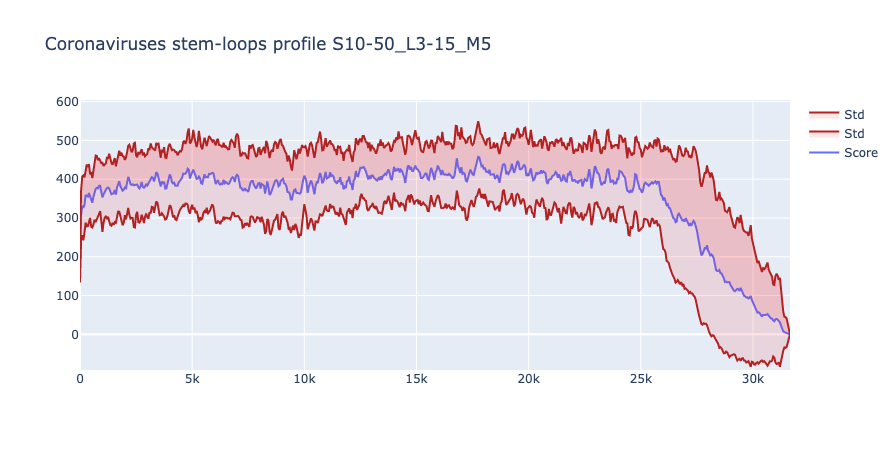

In [21]:
bins_scores_df = pd.read_csv(f'pal_S10-50_L3-15_M5_scores_by_virus_100.csv')
# bins_scores_pvals_df['NegLog10Pval'] = -1 * np.log10(bins_scores_pvals_df.P_val)
# bins_scores_pvals_df['NegLog10AdjPval'] = -1 * np.log10(bins_scores_pvals_df.P_val_adjusted)
# LOG_DEFAULT_THRESHOLD = -1 * np.log10(PVAL_THRESHOLD)
bins_scores_df_by_bins = bins_scores_df.groupby('Start').agg({'Score': np.mean}).reset_index()
bins_scores_df_by_bins['Std'] = bins_scores_df.groupby('Start').agg({'Score': np.std}).reset_index(drop=True)
bins_scores_df_by_bins = bins_scores_df_by_bins.fillna(0)
MAX_Y_VALUE = (bins_scores_df_by_bins['Score'] + bins_scores_df_by_bins['Std']).max() * 1.1
MIN_Y_VALUE = (bins_scores_df_by_bins['Score'] - bins_scores_df_by_bins['Std']).min() * 1.1
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=bins_scores_df_by_bins['Start'],
        y=bins_scores_df_by_bins['Score'],
        name='Score',
    )
)
fig.add_trace(
    go.Scatter(
        x=bins_scores_df_by_bins['Start'],
        y=bins_scores_df_by_bins['Score'] + bins_scores_df_by_bins['Std'],
        name='Std',
        fill='tonexty',
        fillcolor='rgba(255, 0, 0, 0.1)',
        line=dict(color='firebrick'),
        opacity=0.1
    )
)
fig.add_trace(
    go.Scatter(
        x=bins_scores_df_by_bins['Start'],
        y=bins_scores_df_by_bins['Score'] - bins_scores_df_by_bins['Std'],
        name='Std',
        fill='tonexty',
        fillcolor='rgba(255, 0, 0, 0.1)',
        line=dict(color='firebrick'),
        opacity=0.1
    )
)
fig.update_layout(
    title='Coronaviruses stem-loops profile S10-50_L3-15_M5',
)
fig.update_yaxes(range=[MIN_Y_VALUE, MAX_Y_VALUE])
fig.show()

In [9]:
sequences = list(SeqIO.parse('all_cornaviruses_ncbi.fasta', 'fasta'))

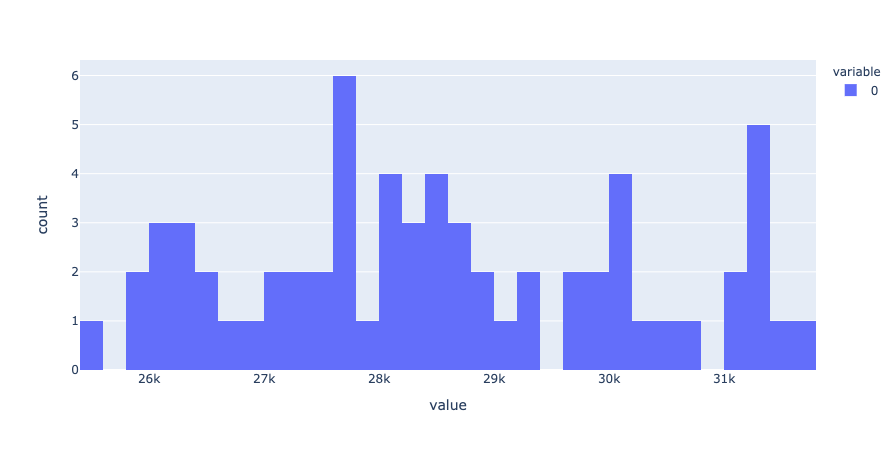

In [14]:
px.histogram([len(x) for x in sequences], nbins=50)

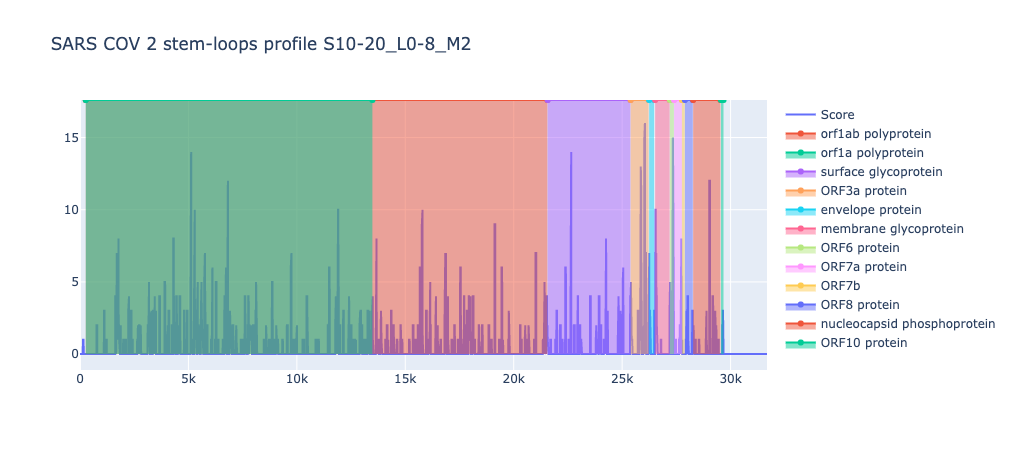

In [39]:
bins_scores_df = pd.read_csv(f'sars_cov_2_pal_S10-20_L0-8_M2_sars_cov_2_scores_by_virus_10.csv')
# bins_scores_pvals_df['NegLog10Pval'] = -1 * np.log10(bins_scores_pvals_df.P_val)
# bins_scores_pvals_df['NegLog10AdjPval'] = -1 * np.log10(bins_scores_pvals_df.P_val_adjusted)
# LOG_DEFAULT_THRESHOLD = -1 * np.log10(PVAL_THRESHOLD)
bins_scores_df_by_bins = bins_scores_df.groupby('Start').agg({'Score': np.mean}).reset_index()
bins_scores_df_by_bins['Std'] = bins_scores_df.groupby('Start').agg({'Score': np.std}).reset_index(drop=True)
bins_scores_df_by_bins = bins_scores_df_by_bins.fillna(0)
MAX_Y_VALUE = bins_scores_df_by_bins['Score'].max() * 1.1
MIN_Y_VALUE = -1 * 1.1
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=bins_scores_df_by_bins['Start'],
        y=bins_scores_df_by_bins['Score'],
        name='Score',
    )
)
proteins_df = pd.read_csv('proteins_86693_757732.csv', header=0)
y = 1
for _, row in proteins_df.iterrows():
    fig.add_trace(
        go.Scatter(
            x=[row.Start, row.Stop],
            y=[MAX_Y_VALUE*y, MAX_Y_VALUE*y],
            name=row['Protein Name'],
            fill='tozeroy',
            opacity=0.1
        )
    )
fig.update_layout(
    title='SARS COV 2 stem-loops profile S10-20_L0-8_M2',
)
fig.update_yaxes(range=[MIN_Y_VALUE, MAX_Y_VALUE])
fig.show()

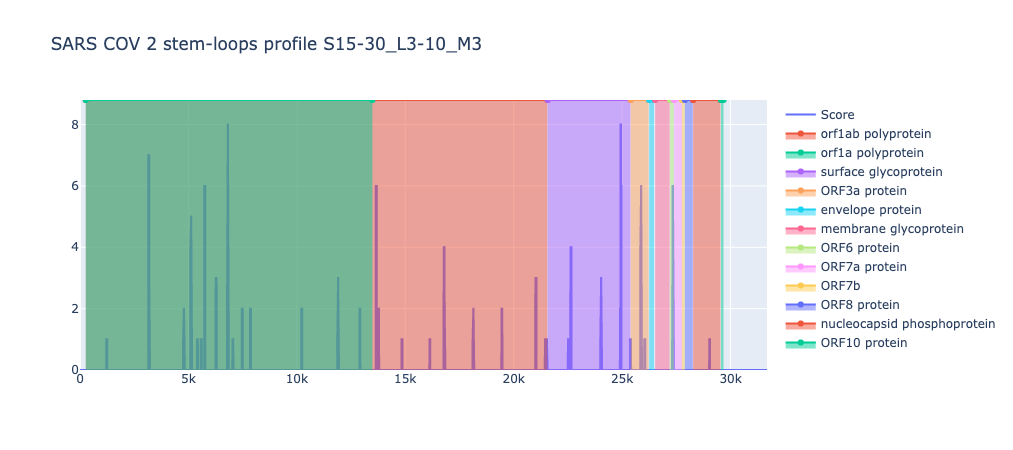

In [40]:
bins_scores_df = pd.read_csv(f'sars_cov_2_pal_S15-30_L3-10_M3_sars_cov_2_scores_by_virus_10.csv')
# bins_scores_pvals_df['NegLog10Pval'] = -1 * np.log10(bins_scores_pvals_df.P_val)
# bins_scores_pvals_df['NegLog10AdjPval'] = -1 * np.log10(bins_scores_pvals_df.P_val_adjusted)
# LOG_DEFAULT_THRESHOLD = -1 * np.log10(PVAL_THRESHOLD)
bins_scores_df_by_bins = bins_scores_df.groupby('Start').agg({'Score': np.mean}).reset_index()
bins_scores_df_by_bins['Std'] = bins_scores_df.groupby('Start').agg({'Score': np.std}).reset_index(drop=True)
bins_scores_df_by_bins = bins_scores_df_by_bins.fillna(0)
MAX_Y_VALUE = bins_scores_df_by_bins['Score'].max() * 1.1
MIN_Y_VALUE = 0
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=bins_scores_df_by_bins['Start'],
        y=bins_scores_df_by_bins['Score'],
        name='Score',
    )
)
y = 1
for _, row in proteins_df.iterrows():
    fig.add_trace(
        go.Scatter(
            x=[row.Start, row.Stop],
            y=[MAX_Y_VALUE*y, MAX_Y_VALUE*y],
            name=row['Protein Name'],
            fill='tozeroy',
            opacity=0.1
        )
    )
fig.update_layout(
    title='SARS COV 2 stem-loops profile S15-30_L3-10_M3',
)
fig.update_yaxes(range=[MIN_Y_VALUE, MAX_Y_VALUE])
fig.show()

In [41]:
bins_scores_df_by_bins

,Start,Score,Std
0,0,0,0.0
1,5,0,0.0
2,10,0,0.0
3,15,0,0.0
4,20,0,0.0
...,...,...,...
6332,31660,0,0.0
6333,31665,0,0.0
6334,31670,0,0.0
6335,31675,0,0.0
